# Brute-Force SPCA
This notebook implements the brute-force Sparse PCA algorithm. We compare performance across different values of sparsity `k` and matrix dimensions `p`.


In [1]:
pip install joblib

In [2]:
import numpy as np
import math
from itertools import combinations
from tqdm import tqdm
import matplotlib.pyplot as plt
from joblib import Parallel, delayed



In [3]:
# Brute-force Sparse PCA with parallelization
def brute_force_spca(orig_matrix, k):
    p = orig_matrix.shape[0]
    max_val = 0
    best_subset = None

    def process_subset(subset):
        submatrix = orig_matrix[np.ix_(subset, subset)]
        eigval = np.linalg.norm(submatrix, ord=2)
        return eigval, subset

    subsets = combinations(range(p), k)

    # Parallelize the subset processing
    results = Parallel(n_jobs=-1)(delayed(process_subset)(subset) for subset in tqdm(subsets, total=math.comb(p, k)))

    # Find the max eigenvalue and best subset
    for eigval, subset in results:
        if eigval > max_val:
            max_val = eigval
            best_subset = subset

    return max_val, best_subset

In [5]:
# Set up synthetic matrix
np.random.seed(42)
K = 20
p = 10
D = np.random.randn(K, p)
D /= np.linalg.norm(D, axis=1, ord=2, keepdims=True)
B = D @ D.T
B /= np.linalg.norm(B, ord=2)

# Run brute-force SPCA for different k
results = []

MAX_FEASIBLE_K = 20

for k in range(1, K + 1):
    if k <= MAX_FEASIBLE_K:
        val, _ = brute_force_spca(B, k)
    else:
        val = np.nan
    results.append(val)



100%|██████████| 20/20 [00:00<00:00, 54.42it/s]

100%|██████████| 190/190 [00:00<00:00, 6175.07it/s]

100%|██████████| 1140/1140 [00:00<00:00, 15999.26it/s]

100%|██████████| 4845/4845 [00:00<00:00, 23658.97it/s]

100%|██████████| 15504/15504 [00:00<00:00, 25810.65it/s]

100%|██████████| 38760/38760 [00:01<00:00, 21627.39it/s]

100%|██████████| 77520/77520 [00:05<00:00, 13814.47it/s]

100%|██████████| 125970/125970 [00:07<00:00, 17601.92it/s]

100%|██████████| 167960/167960 [00:11<00:00, 14494.49it/s]

100%|██████████| 184756/184756 [00:13<00:00, 14080.50it/s]

100%|██████████| 167960/167960 [00:12<00:00, 12970.41it/s]

100%|██████████| 125970/125970 [00:09<00:00, 12906.16it/s]

100%|██████████| 77520/77520 [00:07<00:00, 9964.98it/s] 

100%|██████████| 38760/38760 [00:03<00:00, 10854.73it/s]

100%|██████████| 15504/15504 [00:01<00:00, 13461.22it/s]

100%|██████████| 4845/4845 [00:00<00:00, 15698.56it/s]

100%|██████████| 1140/1140 [00:00<00:00, 5626.31it/s]

100%|██████████| 190/190 [

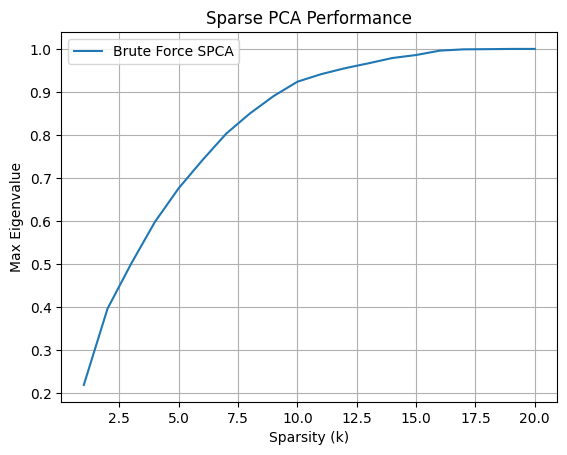

In [6]:
# Plotting the results
plt.plot(range(1, K + 1), results, label="Brute Force SPCA")
plt.xlabel('Sparsity (k)')
plt.ylabel('Max Eigenvalue')
plt.title('Sparse PCA Performance')
plt.grid(True)
plt.legend()
plt.show()

Error computing brute force SPCA for n_dims=2, k=1: index 2 is out of bounds for axis 1 with size 2
Error computing brute force SPCA for n_dims=2, k=2: index 2 is out of bounds for axis 1 with size 2
Skipping n_dims=2, k=3 (k > n_dims)
Skipping n_dims=2, k=4 (k > n_dims)
Skipping n_dims=2, k=5 (k > n_dims)
Skipping n_dims=2, k=6 (k > n_dims)
Skipping n_dims=2, k=7 (k > n_dims)
Skipping n_dims=2, k=8 (k > n_dims)
Skipping n_dims=2, k=9 (k > n_dims)
Skipping n_dims=2, k=10 (k > n_dims)
Skipping n_dims=2, k=11 (k > n_dims)
Skipping n_dims=2, k=12 (k > n_dims)
Skipping n_dims=2, k=13 (k > n_dims)
Skipping n_dims=2, k=14 (k > n_dims)
Skipping n_dims=2, k=15 (k > n_dims)
Skipping n_dims=2, k=16 (k > n_dims)
Skipping n_dims=2, k=17 (k > n_dims)
Skipping n_dims=2, k=18 (k > n_dims)
Skipping n_dims=2, k=19 (k > n_dims)
Skipping n_dims=2, k=20 (k > n_dims)





















  0%|          | 5/10000 [00:01<57:36,  2.89it/s]


Error computing brute force SPCA for n_dims=5, k=1: index 5 is out of bounds for axis 1 with size 5





















 ... (more hidden) ...


















 ... (more hidden) ...

Error computing brute force SPCA for n_dims=5, k=2: index 5 is out of bounds for axis 1 with size 5


  0%|          | 4/49995000 [00:01<5244:28:15,  2.65it/s]


Error computing brute force SPCA for n_dims=5, k=3: index 5 is out of bounds for axis 1 with size 5
Error computing brute force SPCA for n_dims=5, k=4: index 5 is out of bounds for axis 1 with size 5
Error computing brute force SPCA for n_dims=5, k=5: index 5 is out of bounds for axis 1 with size 5
Skipping n_dims=5, k=6 (k > n_dims)
Skipping n_dims=5, k=7 (k > n_dims)
Skipping n_dims=5, k=8 (k > n_dims)
Skipping n_dims=5, k=9 (k > n_dims)
Skipping n_dims=5, k=10 (k > n_dims)
Skipping n_dims=5, k=11 (k > n_dims)
Skipping n_dims=5, k=12 (k > n_dims)
Skipping n_dims=5, k=13 (k > n_dims)
Skipping n_dims=5, k=14 (k > n_dims)
Skipping n_dims=5, k=15 (k > n_dims)
Skipping n_dims=5, k=16 (k > n_dims)
Skipping n_dims=5, k=17 (k > n_dims)
Skipping n_dims=5, k=18 (k > n_dims)
Skipping n_dims=5, k=19 (k > n_dims)
Skipping n_dims=5, k=20 (k > n_dims)





















  0%|          | 4/416416712497500 [00:00<21622389625:03:28,  5.35it/s]


Error computing brute force SPCA for n_dims=10, k=1: index 10 is out of bounds for axis 1 with size 10





















 ... (more hidden) ...


















 ... (more hidden) ...

Error computing brute force SPCA for n_dims=10, k=2: index 10 is out of bounds for axis 1 with size 10
Error computing brute force SPCA for n_dims=10, k=3: index 10 is out of bounds for axis 1 with size 10
Error computing brute force SPCA for n_dims=10, k=4: index 10 is out of bounds for axis 1 with size 10





















  0%|          | 4/416416712497500 [00:00<12777588643:45:32,  9.05it/s]


Error computing brute force SPCA for n_dims=10, k=5: index 10 is out of bounds for axis 1 with size 10





















 ... (more hidden) ...


















 ... (more hidden) ...

Error computing brute force SPCA for n_dims=10, k=6: index 10 is out of bounds for axis 1 with size 10


  0%|          | 4/1386806735798649165000 [00:00<78638179775947307:14:08,  4.90it/s]


Error computing brute force SPCA for n_dims=10, k=7: index 10 is out of bounds for axis 1 with size 10
Error computing brute force SPCA for n_dims=10, k=8: index 10 is out of bounds for axis 1 with size 10
Error computing brute force SPCA for n_dims=10, k=9: index 10 is out of bounds for axis 1 with size 10





















  0%|          | 4/2745826321280434929668521390000 [00:00<74677338453911295934678958:04:48, 10.21it/s]


Error computing brute force SPCA for n_dims=10, k=10: index 10 is out of bounds for axis 1 with size 10
Skipping n_dims=10, k=11 (k > n_dims)
Skipping n_dims=10, k=12 (k > n_dims)
Skipping n_dims=10, k=13 (k > n_dims)
Skipping n_dims=10, k=14 (k > n_dims)
Skipping n_dims=10, k=15 (k > n_dims)
Skipping n_dims=10, k=16 (k > n_dims)
Skipping n_dims=10, k=17 (k > n_dims)
Skipping n_dims=10, k=18 (k > n_dims)
Skipping n_dims=10, k=19 (k > n_dims)
Skipping n_dims=10, k=20 (k > n_dims)
Results: {2: [], 5: [], 10: []}
No results for n_dims=2
No results for n_dims=5
No results for n_dims=10


<ipython-input-16-04634a2c0605>:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


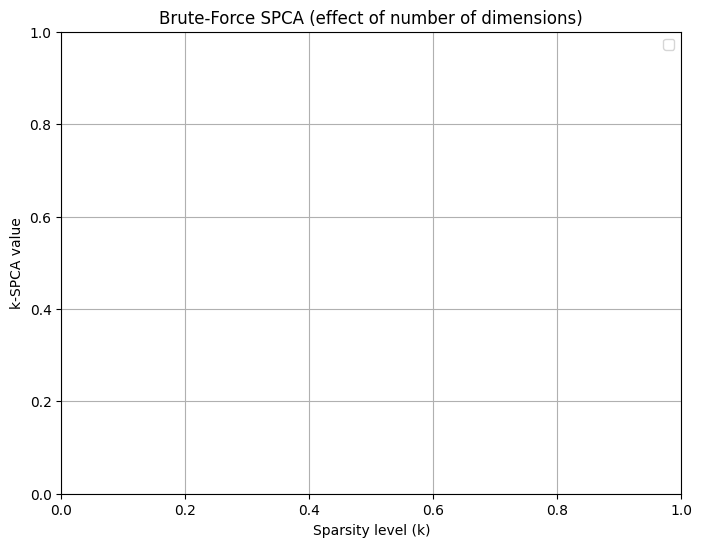

In [16]:
# Brute-force Sparse PCA (Effect of Number of Dimensions)

results_n_dims_brute_force = {}

# Compute Brute-Force SPCA for different dimensions (keeping sparsity levels 1 to 20)
for n_dims in [2, 5, 10]:  # Different numbers of dimensions (p = 10)
    results_n_dims_brute_force[n_dims] = []
    for k in range(1, 21):  # Sparsity levels from 1 to 20
        if k > n_dims:  # Skip if sparsity level is greater than the number of dimensions
            print(f"Skipping n_dims={n_dims}, k={k} (k > n_dims)")  # Debugging output
            continue

        # Generate random data matrix B
        B = np.random.randn(10000, n_dims)  # Fixed sample size of 10000
        B /= np.linalg.norm(B, axis=1, ord=2, keepdims=True)  # Normalize rows

        # Compute the Brute Force SPCA lower bound for each sparsity level
        try:
            val, _ = brute_force_spca(B, k)  # Ensure brute_force_spca is correct
            print(f"Results for n_dims={n_dims}, k={k}: {val}")  # Debugging output
            results_n_dims_brute_force[n_dims].append(val)
        except Exception as e:
            print(f"Error computing brute force SPCA for n_dims={n_dims}, k={k}: {e}")
            continue  # Skip if there is an error

# Check if results are being added
print(f"Results: {results_n_dims_brute_force}")  # Debugging output

# Plotting Brute-Force SPCA (effect of number of dimensions)
plt.figure(figsize=(8, 6))
plt.title("Brute-Force SPCA (effect of number of dimensions)")
for n_dim in results_n_dims_brute_force:
    if results_n_dims_brute_force[n_dim]:  # Only plot if there are results
        plt.plot(range(1, 21), results_n_dims_brute_force[n_dim], label=f'{n_dim} dims')
    else:
        print(f"No results for n_dims={n_dim}")  # Debugging output

plt.xlabel("Sparsity level (k)")
plt.ylabel("k-SPCA value")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()